In [1]:
import numpy as np
import pygad
import pygad.nn
import pygad.gann
import pickle

In [2]:
def fitness_func(ga_instance, solution, sol_idx):
    global GANN_instance, data_inputs, data_outputs

    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],
                                   data_inputs=data_inputs)
    correct_predictions = np.where(predictions == data_outputs)[0].size
    solution_fitness = (correct_predictions / data_outputs.size) * 100

    return solution_fitness


def callback_generation(ga_instance):
    global GANN_instance, last_fitness

    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks,
                                                            population_vectors=ga_instance.population)

    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)

    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))

    last_fitness = ga_instance.best_solution()[1].copy()

In [3]:
with open('./solution.pickle','rb') as r:
    ga_instance = pickle.load(r)
with open('./networks.pickle','rb') as r:
    GANN_instance = pickle.load(r)
data_inputs = np.load('test_data.npy')[:, 2:]
data_outputs = np.load('test_data.npy')[:, 1]

In [4]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
predictions = np.array(pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx], data_inputs=data_inputs))

print("Predictions of the trained network : {predictions}".format(predictions=predictions))
num_wrong = sum(predictions != data_outputs)
num_correct = data_outputs.size - num_wrong
accuracy = 100 * (num_correct / data_outputs.size)
print("Number of correct classifications : {num_correct}.".format(num_correct=num_correct))
print("Number of wrong classifications : {num_wrong}.".format(num_wrong=num_wrong))
print("Classification accuracy : {accuracy}.".format(accuracy=accuracy))

Predictions of the trained network : [1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0
 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0]
Number of correct classifications : 80.
Number of wrong classifications : 20.
Classification accuracy : 80.0.


In [26]:
TP = sum((1 == data_outputs) & (1 == predictions))
FP = sum((0 == data_outputs) & (1 == predictions))
FN = sum((1 == data_outputs) & (0 == predictions))
TN = sum((0 == data_outputs) & (0 == predictions))
print(TP, FP, FN, TN)

26 3 17 54


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

<Axes: >

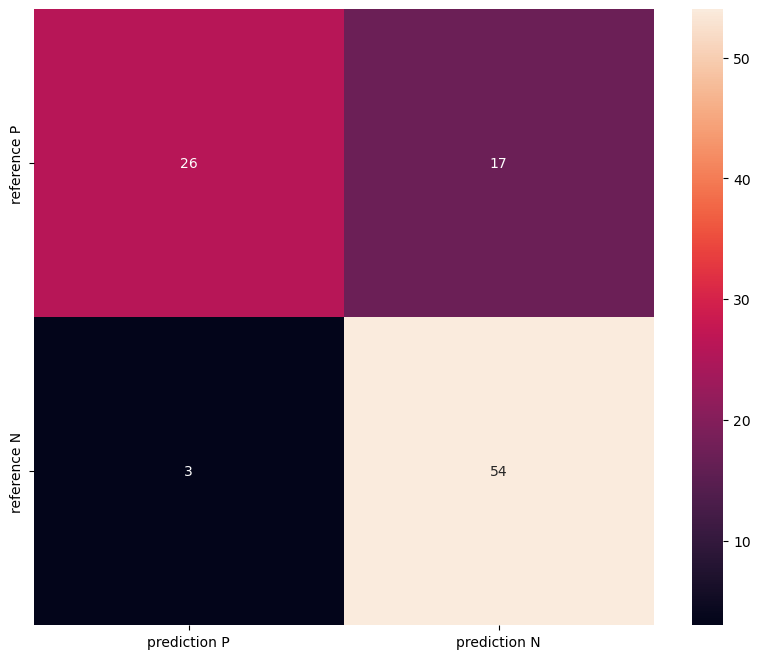

In [28]:
df = pd.DataFrame([[TP, FN], [FP, TN]], index=["reference P", "reference N"], columns=["prediction P", "prediction N"])

plt.figure(figsize=(10,8))
sns.heatmap(data=df, annot=True)

In [18]:
data_inputs = np.load('train_data.npy')[:, 2:]
data_outputs = np.load('train_data.npy')[:, 1]

predictions = np.array(pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx], data_inputs=data_inputs))
print("Predictions of the trained network : {predictions}".format(predictions=predictions))
num_wrong = sum(predictions != data_outputs)
num_correct = data_outputs.size - num_wrong
accuracy = 100 * (num_correct / data_outputs.size)
print("Number of correct classifications : {num_correct}.".format(num_correct=num_correct))
print("Number of wrong classifications : {num_wrong}.".format(num_wrong=num_wrong))
print("Classification accuracy : {accuracy}.".format(accuracy=accuracy))

TP = sum((1 == data_outputs) & (1 == predictions))
FP = sum((0 == data_outputs) & (1 == predictions))
FN = sum((1 == data_outputs) & (0 == predictions))
TN = sum((0 == data_outputs) & (0 == predictions))
print(TP, FP, FN, TN)

Predictions of the trained network : [0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1
 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1
 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0
 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0
 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1
 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 

<Axes: >

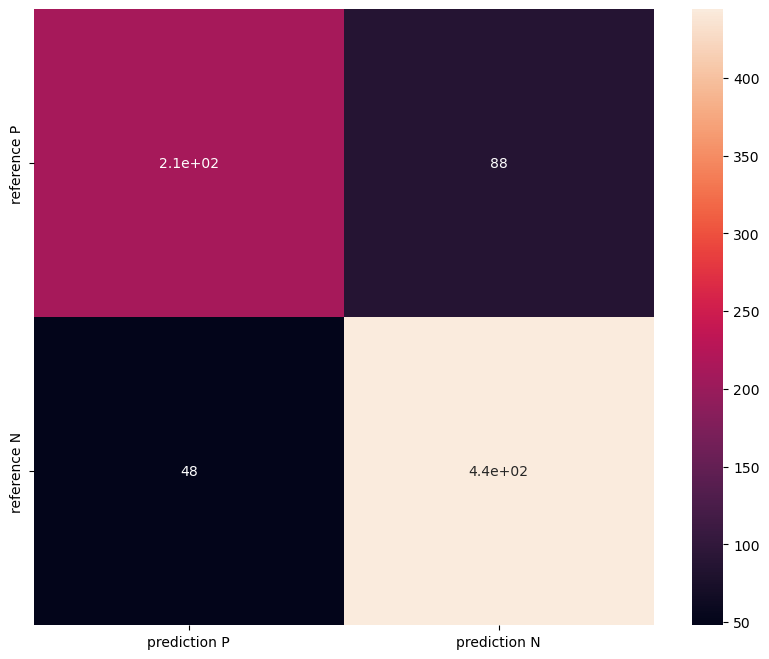

In [19]:
df = pd.DataFrame([[TP, FN], [FP, TN]], index=["reference P", "reference N"], columns=["prediction P", "prediction N"])

plt.figure(figsize=(10,8))
sns.heatmap(data=df, annot=True)

In [5]:
line_data = np.vstack([np.load('adam_accuracy.npy')*100,np.array(ga_instance.best_solutions_fitness[1:])]).T

<Axes: >

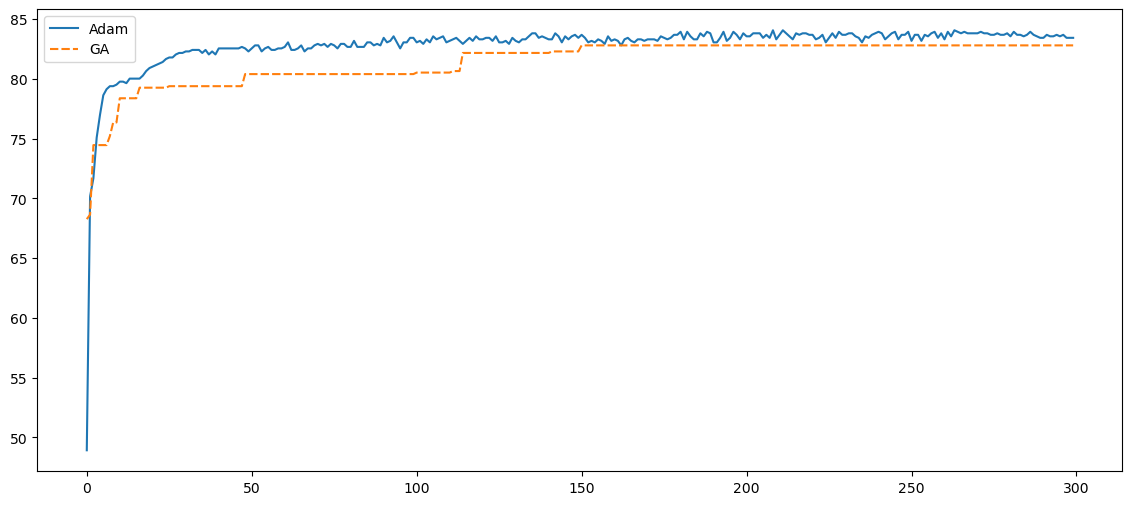

In [8]:
df = pd.DataFrame(line_data, columns=["Adam", "GA"])

plt.figure(figsize=(14,6))
sns.lineplot(data=df)